In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/B1/df_final_2.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141485 entries, 0 to 7141484
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   merchant_category     object 
 2   merchant_type         object 
 3   amount                float64
 4   currency              object 
 5   country               object 
 6   card_type             object 
 7   card_present          int64  
 8   device                object 
 9   channel               object 
 10  distance_from_home    int64  
 11  is_fraud              int64  
 12  hour                  int64  
 13  is_night              int64  
 14  is_peak_hour          int64  
 15  hour_bin              object 
 16  hour_sin              float64
 17  hour_cos              float64
 18  is_large_amount       bool   
 19  log_amount            float64
 20  amount_zscore         float64
 21  is_remote             bool   
 22  is_card_not_present   int64  
 23  device_

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [5]:
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all object-type columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [11]:
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=4))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

              precision    recall  f1-score   support

           0     0.9368    0.9922    0.9637   1176226
           1     0.9499    0.6875    0.7977    252071

    accuracy                         0.9385   1428297
   macro avg     0.9433    0.8399    0.8807   1428297
weighted avg     0.9391    0.9385    0.9344   1428297

AUC-ROC: 0.9680


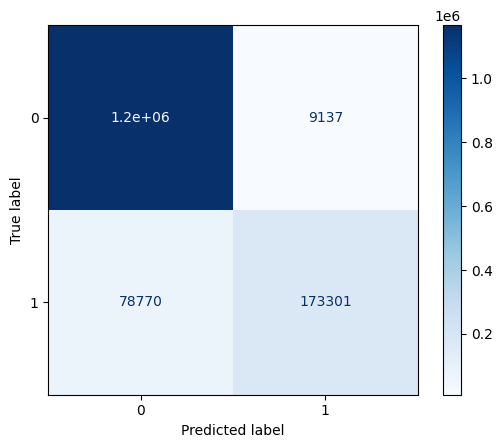

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')

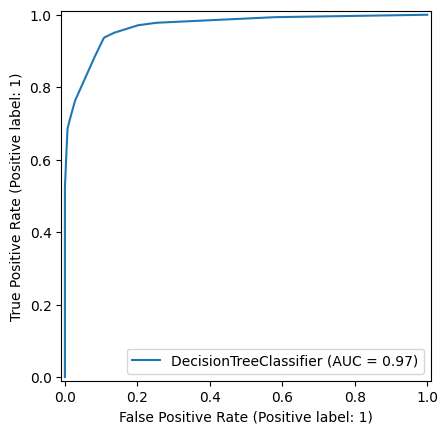

In [15]:
from sklearn.metrics import RocCurveDisplay
y_proba = dt_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)

In [16]:
import pickle
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)

In [17]:
import joblib
joblib.dump(dt_model, "decision_tree_model.joblib")

['decision_tree_model.joblib']